In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("ball_by_ball.csv")

print("Matches shape:", matches.shape)
print("Ball-by-ball shape:", deliveries.shape)

Matches shape: (1095, 20)
Ball-by-ball shape: (260920, 17)


In [19]:

# Merge datasets
ipl_data = pd.merge(
    deliveries,
    matches,
    left_on="match_id",
    right_on="id",
    how="left"
)

print("Merged dataset shape:", ipl_data.shape)
ipl_data.head()

Merged dataset shape: (260920, 37)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [20]:
#Dataset Info
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [21]:
#Missing Values
ipl_data.isnull().sum().sort_values(ascending=False)


method              257274
fielder             251566
player_dismissed    247970
dismissal_kind      247970
extras_type         246795
city                 12397
result_margin         4124
player_of_match        490
winner                 490
target_overs           309
target_runs            309
venue                    0
team1                    0
match_id                 0
team2                    0
toss_winner              0
match_type               0
result                   0
super_over               0
umpire1                  0
toss_decision            0
season                   0
date                     0
inning                   0
id                       0
is_wicket                0
total_runs               0
extra_runs               0
batsman_runs             0
non_striker              0
bowler                   0
batter                   0
ball                     0
over                     0
bowling_team             0
batting_team             0
umpire2                  0
d

In [22]:
#Statistical Summary
ipl_data.describe()


,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,256796.000000,260611.000000,260611.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,9.070665e+05,17.279451,167.290406,19.846742
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,3.679913e+05,21.600307,32.165944,1.224266
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.483340e+05,6.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,9.809670e+05,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.254066e+06,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.426312e+06,146.000000,288.000000,20.000000


In [23]:
#Handle Missing Values
ipl_data['player_dismissed'] = ipl_data['player_dismissed'].fillna("Not Out")
ipl_data['dismissal_kind'] = ipl_data['dismissal_kind'].fillna("None")
ipl_data['fielder'] = ipl_data['fielder'].fillna("None")
ipl_data['winner'] = ipl_data['winner'].fillna("No Result")


In [24]:
#Convert Date Format
ipl_data['date'] = pd.to_datetime(ipl_data['date'])


In [25]:
#Distribution of Runs per Ball
ipl_data.columns = (
    ipl_data.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)


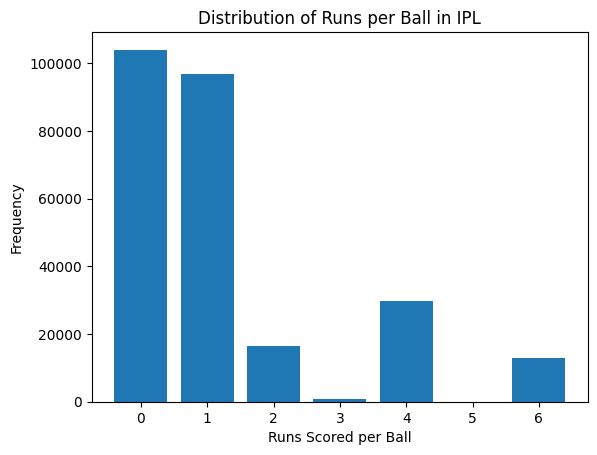

In [26]:
#EDA
#Distribution of Runs per Ball
runs_per_ball = ipl_data['batsman_runs'].value_counts().sort_index()

plt.figure()
plt.bar(runs_per_ball.index, runs_per_ball.values)
plt.xlabel("Runs Scored per Ball")
plt.ylabel("Frequency")
plt.title("Distribution of Runs per Ball in IPL")
plt.show()


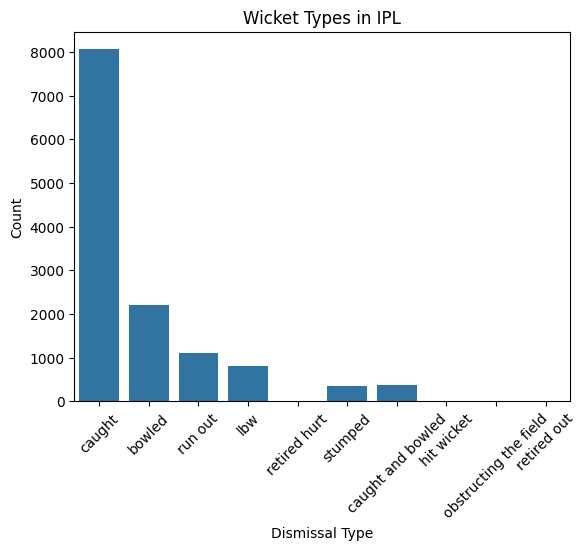

In [27]:
#Wicket Distribution
wickets = ipl_data[ipl_data['player_dismissed'] != "Not Out"]

sns.countplot(data=wickets, x='dismissal_kind')
plt.xticks(rotation=45)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Wicket Types in IPL")
plt.show()


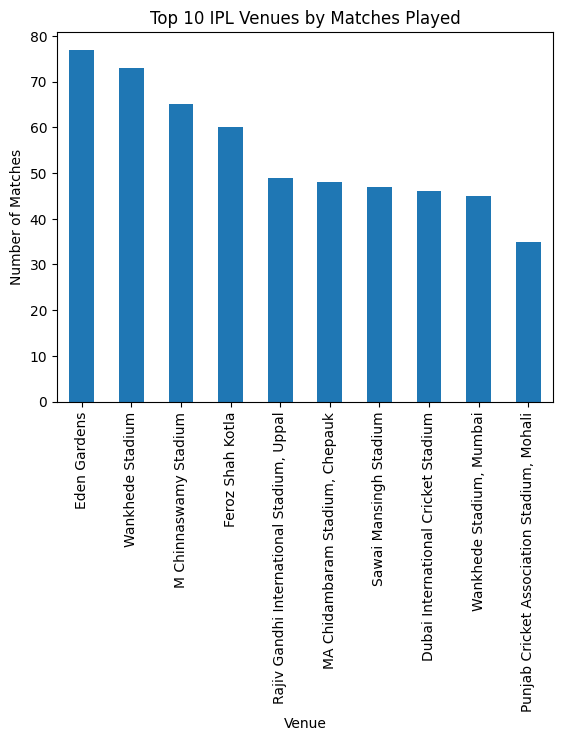

In [28]:
#Venue-wise Match Count
venue_stats = matches['venue'].value_counts().head(10)

plt.figure()
venue_stats.plot(kind='bar')
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.title("Top 10 IPL Venues by Matches Played")
plt.show()


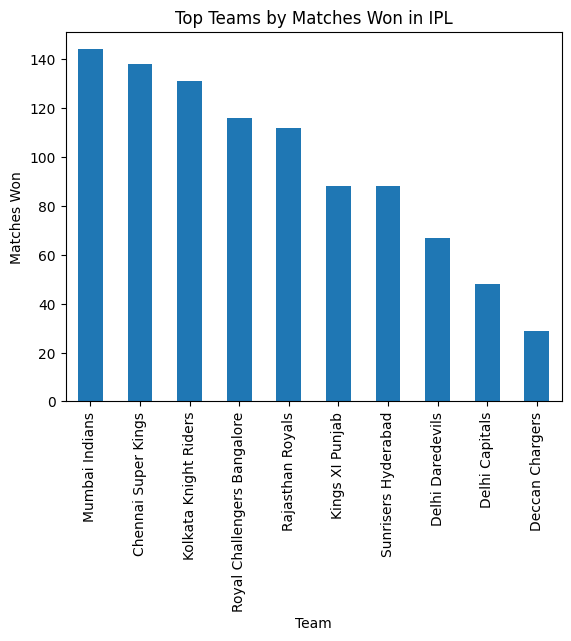

In [29]:
#Team Performance (Matches Won)
team_wins = matches['winner'].value_counts().head(10)

plt.figure()
team_wins.plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Matches Won")
plt.title("Top Teams by Matches Won in IPL")
plt.show()


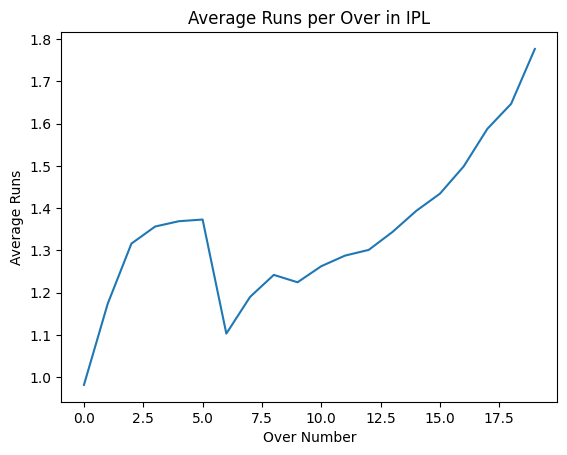

In [30]:
#Average Runs per Over
avg_runs_over = ipl_data.groupby('over')['total_runs'].mean()

plt.figure()
plt.plot(avg_runs_over.index, avg_runs_over.values)
plt.xlabel("Over Number")
plt.ylabel("Average Runs")
plt.title("Average Runs per Over in IPL")
plt.show()
